# Imports (do NOT change/add)

In [1]:
import operator

import csv
import statistics as stats
import math
import random

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Wine Dataset
Loading/analyzing a subset of the [wine dataset](http://archive.ics.uci.edu/ml/datasets/Wine)
* Overlay histograms of the two features (alcohol, ascalinity)
* Output count of points, as well as mean & sample standard deviation of the features

In [2]:
alcohol = []
ascalinity = []

with open('wine_data.csv', "r") as csvfile:
    for row in csv.reader(csvfile):
        alcohol.append(float(row[0]))
        ascalinity.append(float(row[1]))

# each entry is a tuple. returns an iterator that returns pairwise
data = list(zip(alcohol, ascalinity))

178  points
Alcohol: mean=13.00062 , std=0.81183
Ascalinity: mean=19.49494 , std=3.33956


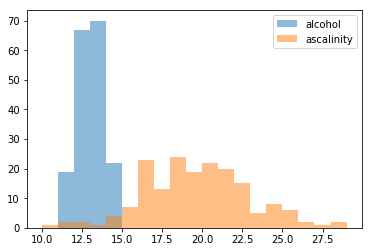

In [3]:
# TODO
# 1. Overlay histograms of the two features (alcohol, ascalinity)
bins=range(10, 30, 1)

plt.hist(alcohol,bins, label='alcohol',alpha=0.5)
plt.hist(ascalinity,bins, label='ascalinity',alpha=0.5)
plt.legend(loc='upper right')

# 2. Output count of points, as well as mean & sample standard deviation of the features
def mean(l):
    if l != []:
        newl = [float(i) for i in l]
        average = sum(newl) / float(len(newl))
        return average
    return 0

def sample_std(lst):
    size = len(lst)
    mean = sum(lst) / size
    diffs = [x - mean for x in lst]
    sq_diffs = [d ** 2 for d in diffs]
    ssd = sum(sq_diffs)
    variance = ssd / (size - 1)
    return math.sqrt(variance)

print(len(alcohol), " points")
print("Alcohol: mean={:.5f}".format(mean(alcohol)),", std={:.5f}".format(sample_std(alcohol)))
print("Ascalinity: mean={:.5f}".format(mean(ascalinity)),", std={:.5f}".format(sample_std(ascalinity)))


# 2. Distance Metrics
* Implement the sse function and the general minkowski distance function

In [4]:
# TODO
# given two points returns the sum-squared-error between two points
def sse(x1, x2):
    return (x2[0] - x1[0])**2 + (x2[1] - x1[1])**2

In [5]:
# TODO
# returns the minkowski distance between x1 and x2
# euclidean and manhattan fall out of this
def minkowski_distance(x1, x2, q):
    return nroot(sum(pow(abs(x-y),q) for x,y in zip(x1, x2)),q)
    #return 0

def nroot(value, q):
    root_value = 1/float(q)
    return round(float(value) ** float(root_value),3)

In [6]:
# returns the L2 distance from x1 to x2
def euclidean_distance(x1, x2):
    return minkowski_distance(x1, x2, 2)

In [7]:
# returns the L1 distance from x1 to x2
def manhattan_distance(x1, x2):
    return minkowski_distance(x1, x2, 1)

In [8]:
t1 = [0,0]
t2 = [3,4]

print("SSE {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, sse(t1, t2), 25.))

print("Euclidean {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, euclidean_distance(t1, t2), 5.))
print("Euclidean {} -> {} = {:.5f}, expected={:.5f}".format(t2, t1, euclidean_distance(t2, t1), 5.))

print("Manhattan {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, manhattan_distance(t1, t2), 7.))
print("Manhattan {} -> {} = {:.5f}, expected={:.5f}".format(t2, t1, manhattan_distance(t2, t1), 7.))

SSE [0, 0] -> [3, 4] = 25.00000, expected=25.00000
Euclidean [0, 0] -> [3, 4] = 5.00000, expected=5.00000
Euclidean [3, 4] -> [0, 0] = 5.00000, expected=5.00000
Manhattan [0, 0] -> [3, 4] = 7.00000, expected=7.00000
Manhattan [3, 4] -> [0, 0] = 7.00000, expected=7.00000


# 3. K-Means
* Implement choose_cluster (find the closest centroid w.r.t. a distance metric)
* Implement k-means
* Respond to a question regarding plotted clusterings

In [9]:
# TODO
# Inputs: centroid locations, point, distance metric
# Outputs: centroid index that is closest
def choose_cluster(centroids, x, distance_metric):
    best_index = 0
    closest = distance_metric(centroids[0],x)
    for index in range(len(centroids)):
        dist = distance_metric(centroids[index],x)
        if dist < closest:
            closest = dist
            best_index = index
    return best_index
    # min({idx:distance_metrix(x,c)})

In [10]:
# TODO
# Inputs: 
#  initial_centroids: locations (length=K)
#  data: data points (length=N)
#  distance_metric: how to select the closest point in the e-step
# 
# Outputs:
#  centroids: locations (length=K)
#  new_clusters: for each data point, index of associated cluster
#  iterations: count of iterations taken
#  total_sse: SSE of final clustering
def kmeans(initial_centroids, data, distance_metric):
    centroids = initial_centroids[:]
    new_clusters = [-1] * len(data) # for each one of the pts what cluster do they go to
    iterations = 0
    total_sse = 0 # total sse of last iteration
    old_centroids = centroids
    while not has_converged(centroids,old_centroids,iterations):
        index = 0
        for x,y in data:
            t = [x,y]
            new_clusters[index] = choose_cluster(centroids, t, distance_metric)
            index+=1
 
        # recalc centriods
        recalc_centriods = {}
        for i, point in zip(new_clusters, data):
            if i in recalc_centriods:
                recalc_centriods[i].append(point)
            else:
                recalc_centriods[i] = [point]
        old_centroids = centroids
        sortedDict = {}
        for key, value in sorted(recalc_centriods.items()):
            sortedDict[key] = value
        centroids = [calc_average(pts) for pts in sortedDict.values()]
        iterations += 1
        
    total_sse = sum([sse(centroids[i],x2) for i,x2 in zip(new_clusters, data)])
    #print(total_sse)
    #print(iterations)
    return centroids, new_clusters, iterations, total_sse

def calc_average(pts):
    size = len(pts)
    return sum([x for x,y in pts])/size, sum([y for x, y in pts])/size

def has_converged(centroids, old_centroids, iterations):
    MAX = 100
    if iterations == 0:
        return False
    elif iterations > MAX:
        return True
    return all([c[1]==oc[1] and c[0]==oc[0] for c,oc in zip(centroids, old_centroids)])
    #old_centroids == centroids

In [11]:
def cluster_plot(centroids, data, clustering):
    for i,c in enumerate(centroids):
        points = [data[idx] for idx,c in enumerate(clustering) if c == i]
        plt.scatter([d[0] for d in points], [d[1] for d in points], label="{}".format(i))
        plt.plot(c[0], c[1], 'kx', mew=5, ms=10)

In [12]:
initial_centroids = [data[175], data[25], data[67]]

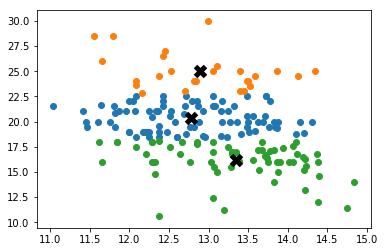

In [13]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, euclidean_distance)
cluster_plot(centroids, data, clustering)

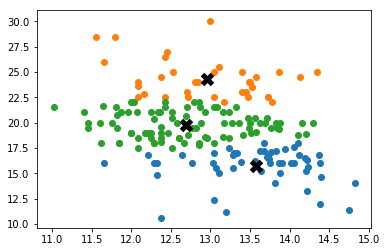

In [14]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, manhattan_distance)
cluster_plot(centroids, data, clustering)

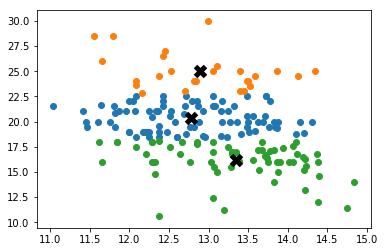

In [15]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, lambda x,y: minkowski_distance(x, y, 3))
cluster_plot(centroids, data, clustering)

## Q: What conclusion can you draw from these plots?
When using the euclidean distance, we iterated through one time less. When using the manhanttan distance, our centroid locations varied more in comparison to the other two plots and the grouping appeared to be slightly different. Using the manhattan distance, the cluster assignment coloring had changed for the middle cluster as well. Overall, the plots are very similar.

# 4. Choosing K
* Runs several trials of K-Means with different initial points (Forgy), recording SSE
* Plot SSE vs K
* Respond to the question below

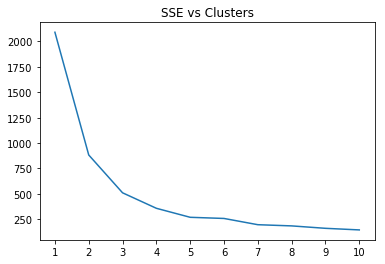

In [16]:
# iterate from 1-10, 5 different ways for selecting diff locations
# take average of sse's, then go on to the next one
# random.sample
max_clusters = 10
trials = 5
clusters = []
sses = []
random.seed(8675309)

# TODO
# 1. Perform 5 trials (randomizing initial points ala Forgy) for each of K=1, 2, ... 10
i=0
while i < trials:
    for k in range(1,max_clusters+1):
        centroids = [data[random.randint(0, 150)] for m in range(k)]
        centroids, clustering, iterations, errors = kmeans(centroids, data, euclidean_distance)
        if i != 0:
            sses[k-1] += errors
        else:
            clusters.append(k)
            sses.append(errors)
    i+=1
sses = [s / trials for s in sses]

# 2. Plot SSE vs K
plt.plot(clusters, sses)
plt.xticks(range(1, len(clusters)+1, 1))
plt.title('SSE vs Clusters')

## Q: What is a reasonable value for K based upon this data -- why?
When we plot K against SSE, as K gets larger the error decreases. Using the elbow method, this can help us choose K at the point in which SSE decreases abruptly. Looking at the graph, a reasonable K seems to be about 3 since that's where it looks like it 'bends'.